<a href="https://colab.research.google.com/github/JOSELUISMILLA/NET8APIDEMO/blob/main/MapReduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MapReduce
Cuaderno de PhD.(c) Ricardo Alonzo Fernández Salguero

## Introducción

En el mundo actual, la generación y acumulación de datos ha alcanzado proporciones masivas, dando lugar a lo que conocemos como Big Data. Para procesar y analizar estos enormes conjuntos de datos de manera eficiente, se requieren enfoques y herramientas especiales. Uno de los enfoques más destacados es **MapReduce**, un paradigma de programación desarrollado por Google que se ha convertido en la columna vertebral de muchas soluciones de procesamiento de Big Data. En este documento, exploraremos teóricamente y formalizaremos el concepto de MapReduce.

## MapReduce: Concepto Básico

**MapReduce** es un modelo de programación y procesamiento paralelo diseñado para el procesamiento eficiente de datos a gran escala. La idea fundamental detrás de MapReduce es dividir una tarea compleja en subproblemas más pequeños que pueden ser resueltos de manera independiente en paralelo. Esto permite aprovechar el poder de cómputo de clústeres de máquinas interconectadas para acelerar significativamente el procesamiento de grandes conjuntos de datos.

El proceso MapReduce consta de dos fases principales: la fase de **map** y la fase de **reduce**.

## Fase de Map

En la fase de **map**, los datos de entrada se dividen en fragmentos más pequeños y se asigna una función de mapeo a cada fragmento. Esta función de mapeo toma el fragmento de datos como entrada y produce una lista de pares clave-valor (key-value pairs). Estos pares clave-valor se utilizan para representar información relevante dentro del fragmento de datos. El resultado de esta fase es una colección de pares clave-valor intermedios.

Formalización de la fase de Map:
```
map(input_key, input_value) ->
    // Procesar input_key y input_value
    // Generar una lista de pares clave-valor intermedios
    emit(intermediate_key, intermediate_value)
```

## Shuffle y Ordenamiento

Después de la fase de map, los pares clave-valor intermedios se agrupan según su clave y se ordenan. Esto es crucial para la fase de reduce, ya que garantiza que todos los valores asociados con una clave en particular estén disponibles en el mismo nodo para el procesamiento posterior.

## Fase de Reduce

En la fase de **reduce**, los pares clave-valor intermedios se agrupan según su clave y se entregan a una función de reducción. Esta función de reducción toma una clave y la lista de valores asociados a esa clave, y realiza algún tipo de cálculo o análisis sobre estos valores para producir un conjunto más pequeño de valores de salida.

Formalización de la fase de Reduce:
```
reduce(intermediate_key, list_of_values) ->
    // Procesar list_of_values asociados con intermediate_key
    // Generar un conjunto de valores de salida
    emit(output_key, output_value)
```

## Paralelismo y Tolerancia a Fallas

Un aspecto fundamental de MapReduce es su capacidad para el procesamiento paralelo y la tolerancia a fallas. Los nodos de un clúster pueden trabajar en paralelo en las fases de map y reduce, lo que acelera significativamente el procesamiento. Además, si un nodo falla durante el proceso, las tareas se redistribuyen automáticamente a otros nodos, lo que garantiza la continuidad del proceso.

## Conclusión

MapReduce es un paradigma de programación esencial en el mundo del Big Data. Su capacidad para dividir tareas complejas en operaciones de mapeo y reducción más pequeñas, y para ejecutarlas en paralelo en clústeres de máquinas, ha revolucionado la forma en que se procesan y analizan los grandes conjuntos de datos. Su formalización y enfoque en el paralelismo y la tolerancia a fallas lo convierten en una herramienta poderosa para el procesamiento eficiente de Big Data.

# Diagrama de Proceso de Reducción y Agregación

El diagrama ilustra el proceso de reducción y agregación de datos utilizando funciones de reducción en un entorno de procesamiento. El proceso involucra varias etapas, cada una desempeñando un papel específico en la transformación de los datos.

## Proceso de Reducción

El proceso se inicia con la función de *Reducer*. Un *Reducer* es una función que toma varios valores y los reduce a un valor único según una operación específica. En el diagrama, se representa como un rectángulo con el título "Reducer Function".

## Operaciones de Agregación

A continuación, los datos procesados por el *Reducer* son pasados a las "Operaciones de Agregación". Estas operaciones pueden ser cálculos matemáticos, combinación de valores o cualquier otra manipulación que permita agrupar y resumir los datos. En el diagrama, las "Operaciones de Agregación" están representadas como otro rectángulo.

## Resultados de Agregación Parciales

Las operaciones de agregación generan "Resultados de Agregación Parciales". Estos resultados son intermedios y representan pasos intermedios en la creación del resultado final. Los "Resultados de Agregación Parciales" se almacenan temporalmente y se utilizan en la siguiente etapa del proceso.

## Resultado Final de Agregación

Finalmente, los "Resultados de Agregación Parciales" se combinan en el "Resultado Final de Agregación". Este resultado representa el resumen o la agregación completa de los datos originales. En el diagrama, se muestra como el último rectángulo.

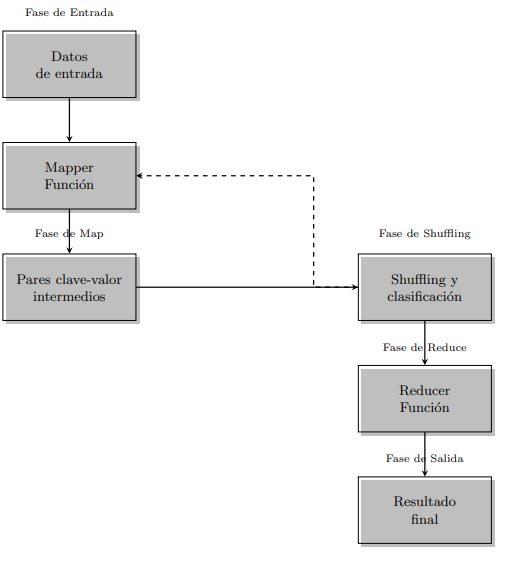

# Diagrama de Proceso de Reducción y Agregación con Sombreado

Este diagrama representa el proceso de reducción y agregación de datos utilizando funciones de reducción, operaciones de agregación y resultados parciales en un entorno de procesamiento. El diagrama utiliza sombreado y colores para distinguir cada etapa del proceso.

## Datos de Entrada

El proceso comienza con los "Datos de Reducer", que son los datos iniciales que se van a procesar. Estos datos se representan como un rectángulo con sombreado azul claro en la parte superior del diagrama.

## Función de Reducción

Luego, los datos se pasan a la "Función de Reducción". Esta función toma los datos y los reduce a un valor único según un criterio específico. En el diagrama, la "Función de Reducción" está representada como un rectángulo con sombreado verde claro debajo de los datos de entrada.

## Operaciones de Agregación

Después de la reducción, los datos procesados se someten a "Operaciones de Agregación". Estas operaciones pueden ser cálculos matemáticos u otras manipulaciones que agregan información relevante. Las "Operaciones de Agregación" se representan como un rectángulo con sombreado amarillo claro debajo de la función de reducción.

## Resultados Parciales

Las operaciones de agregación generan "Resultados Parciales", que son resúmenes intermedios de los datos. En el diagrama, hay dos resultados parciales representados como rectángulos con sombreado naranja claro en la parte inferior izquierda y derecha del diagrama.

## Resultado Final

Los "Resultados Parciales" se combinan para obtener el "Resultado Final". Este resultado representa la agregación completa de los datos originales. El "Resultado Final" se muestra como un rectángulo con sombreado rojo claro en la parte inferior del diagrama.




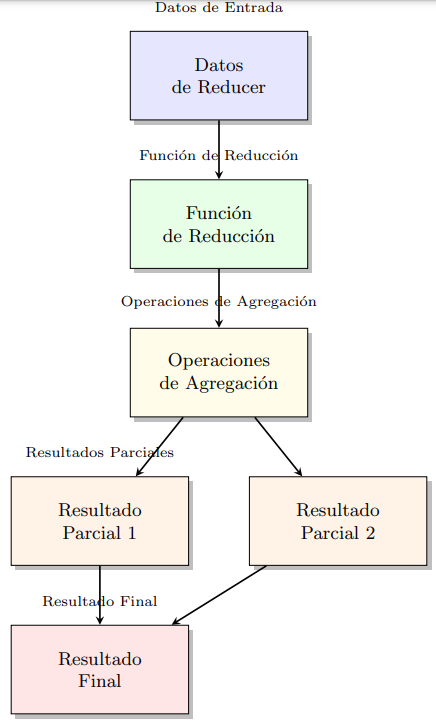

#Ejemplos

## Contar palabras

### Importando módulos y descargando recursos
```python
import re
from collections import Counter
from multiprocessing import Pool
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg, stopwords

nltk.download('gutenberg')
nltk.download('stopwords')
```
En esta sección, importamos los módulos necesarios para ejecutar el código. `re` es utilizado para trabajar con expresiones regulares, `Counter` es una clase que nos permite contar elementos en una colección, `Pool` es parte del módulo `multiprocessing` para realizar procesamiento en paralelo, `nltk` es la librería Natural Language Toolkit utilizada para el procesamiento de lenguaje natural, y `matplotlib.pyplot` se usa para generar gráficos. Además, descargamos recursos adicionales del corpus Gutenberg y stopwords (palabras vacías).

### Obtención y limpieza del texto de "Moby Dick"
```python
moby_dick_words = gutenberg.words('melville-moby_dick.txt')
moby_dick_text = ' '.join(moby_dick_words)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

cleaned_moby_dick = clean_text(moby_dick_text)
```
Aquí, se obtienen las palabras del libro "Moby Dick" del corpus Gutenberg y se convierten en un solo texto. Luego, se define la función `clean_text` que realiza la limpieza del texto: convierte a minúsculas, elimina signos de puntuación y caracteres especiales, divide el texto en palabras individuales y elimina las palabras vacías (stop words). El resultado limpio se almacena en `cleaned_moby_dick`.

### Preparación de datos y funciones de mapeo y reducción
```python
documents = [cleaned_moby_dick]

def map_function(document):
    words = document.split()
    return Counter(words)

def reduce_function(counters):
    result = sum(counters, Counter())
    return result
```
Aquí, se prepara una lista llamada `documents` que contiene el texto limpio. Luego, se definen dos funciones cruciales para el procesamiento paralelo: `map_function` que toma un documento, lo divide en palabras y crea un contador de palabras y su frecuencia, y `reduce_function` que recibe una lista de contadores y los combina en uno solo.

### Ejecución principal en paralelo
```python
if __name__ == "__main__":
    with Pool() as pool:
        print(f"Procesando {len(documents)} documento(s) en paralelo...")
        mapped_results = pool.map(map_function, documents)
        print("Resultados intermedios del mapeo:")
        for idx, result in enumerate(mapped_results):
            print(f"Documento {idx + 1}: {result}")
        final_result = reduce_function(mapped_results)
        print("Resultado del conteo de palabras:")
        print(final_result)
```
El bloque `if __name__ == "__main__":` es necesario para asegurar que el código solo se ejecute si este script es el archivo principal. Se crea un pool de procesos llamado `pool` para aprovechar el procesamiento en paralelo. Se aplica la función de mapeo a cada documento en paralelo utilizando `pool.map`. Los resultados intermedios se imprimen en pantalla. Luego, se aplica la función de reducción para combinar los contadores individuales y obtener el resultado final del conteo de palabras.

### Generación del gráfico de barras
```python
common_words = final_result.most_common(10)
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más comunes en el documento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

Se obtienen las 10 palabras más comunes y su frecuencia a partir del resultado final del conteo de palabras. Se desempaquetan las palabras y las frecuencias en las variables `words` y `counts`. Se crea un gráfico de barras utilizando `matplotlib.pyplot`, mostrando las palabras en el eje x y la frecuencia en el eje y. Se personalizan los títulos, etiquetas y el diseño del gráfico, y finalmente se muestra el gráfico utilizando `plt.show()`.

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Procesando 1 documento(s) en paralelo...
Resultados intermedios del mapeo:
Documento 1: Counter({'whale': 1226, 'one': 921, 'like': 647, 'upon': 566, 'man': 527, 'ship': 518, 'ahab': 511, 'ye': 472, 'sea': 455, 'old': 450, 'would': 432, 'though': 384, 'head': 345, 'yet': 345, 'boat': 336, 'time': 334, 'long': 333, 'captain': 329, 'still': 312, 'great': 306, 'said': 304, 'two': 298, 'must': 283, 'seemed': 283, 'white': 281, 'last': 277, 'see': 272, 'thou': 271, 'way': 271, 'whales': 268, 'stubb': 257, 'queequeg': 252, 'little': 249, 'round': 247, 'three': 245, 'say': 244, 'men': 244, 'sperm': 244, 'may': 240, 'first': 235, 'every': 232, 'well': 230, 'us': 228, 'much': 223, 'could': 216, 'good': 216, 'hand': 214, 'side': 208, 'ever': 206, 'never': 206, 'look': 205, 'starbuck': 198, 'deck': 196, 'almost': 195, 'go': 194, 'even': 191, 'water': 190, 'thing': 188, 'might': 183, 'away': 183, 'come': 179, 'made': 178, 'world': 176, 'day': 176, 'sir': 175, 'life': 174, 'chapter': 173, 'pequod':

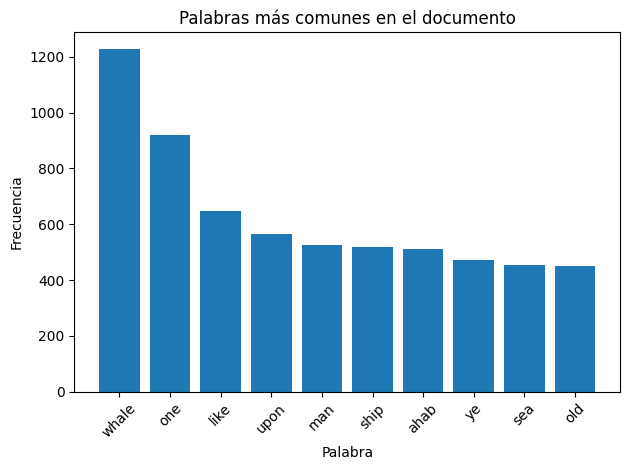

In [ ]:
import re
from collections import Counter
from multiprocessing import Pool
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg, stopwords
nltk.download('gutenberg')
nltk.download('stopwords')

# Obtiene las palabras del libro "Moby Dick" del corpus Gutenberg
moby_dick_words = gutenberg.words('melville-moby_dick.txt')

# Convierte todas las palabras de "Moby Dick" en un solo texto
moby_dick_text = ' '.join(moby_dick_words)

# Función para limpiar el texto
def clean_text(text):
    # Convierte a minúsculas
    text = text.lower()

    # Elimina signos de puntuación y caracteres especiales
    text = re.sub(r'[^\w\s]', '', text)

    # Divide el texto en palabras
    words = text.split()

    # Elimina las palabras vacías (stop words)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# Limpia el texto completo de Moby Dick
cleaned_moby_dick = clean_text(moby_dick_text)

# Lista de documentos limpios a procesar, en este caso solo hay un documento
documents = [cleaned_moby_dick]

# Función de mapeo: cuenta las palabras en un documento
def map_function(document):
    words = document.split()  # Divide el texto en palabras individuales
    return Counter(words)  # Crea un contador de las palabras y su frecuencia

# Función de reducción: combina los resultados de los contadores
def reduce_function(counters):
    result = sum(counters, Counter())  # Combina los contadores en uno solo
    return result

# Bloque principal de ejecución
if __name__ == "__main__":
    # Crea un Pool para realizar el procesamiento en paralelo
    with Pool() as pool:
        print(f"Procesando {len(documents)} documento(s) en paralelo...")

        # Aplica la función de mapeo a cada documento en paralelo
        mapped_results = pool.map(map_function, documents)

        # Imprime los resultados intermedios después del mapeo
        print("Resultados intermedios del mapeo:")
        for idx, result in enumerate(mapped_results):
            print(f"Documento {idx + 1}: {result}")

        # Aplica la función de reducción para combinar los resultados
        final_result = reduce_function(mapped_results)

        # Imprime el resultado final del conteo de palabras
        print("Resultado del conteo de palabras:")
        print(final_result)

        # Gráfico de barras: palabras más comunes y su frecuencia
        common_words = final_result.most_common(10)  # Las 10 palabras más comunes
        words, counts = zip(*common_words)
        plt.bar(words, counts)
        plt.xlabel('Palabra')
        plt.ylabel('Frecuencia')
        plt.title('Palabras más comunes en el documento')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


#Análisis de Logs

Este código realiza una simulación de registros de servidores, aplica un proceso de mapeo y reducción en paralelo para contar los códigos de respuesta HTTP más comunes, e imprime los resultados y una visualización gráfica de la distribución de códigos de respuesta HTTP. El uso de la biblioteca `multiprocessing` permite aprovechar el procesamiento paralelo para mejorar la eficiencia del proceso.

```python
import random
from collections import Counter
import matplotlib.pyplot as plt
import multiprocessing
```

- `import random`: Importa el módulo `random`, que se utiliza para generar números aleatorios y tomar decisiones aleatorias.
- `from collections import Counter`: Importa la clase `Counter` del módulo `collections`. `Counter` es una estructura de datos que permite contar las ocurrencias de elementos en una colección.
- `import matplotlib.pyplot as plt`: Importa el módulo `matplotlib.pyplot` bajo el alias `plt`. Este módulo se utiliza para crear gráficos y visualizaciones.
- `import multiprocessing`: Importa el módulo `multiprocessing`, que proporciona soporte para la ejecución paralela de código en varios procesos.

```python
def generate_fake_logs(num_logs):
    logs = []
    for _ in range(num_logs):
        ip = f"192.168.1.{random.randint(1, 100)}"
        http_code = random.choice([200, 200, 200, 404, 500])
        logs.append((ip, http_code))
    return logs
```

- `generate_fake_logs(num_logs)`: Define una función llamada `generate_fake_logs` que toma un argumento `num_logs`, que representa el número de registros de servidores simulados que se generarán.
- Se inicializa una lista vacía `logs` para almacenar los registros generados.
- Un bucle `for` se ejecuta `num_logs` veces. En cada iteración:
  - Se genera una dirección IP simulada en el formato "192.168.1.x", donde `x` es un número aleatorio entre 1 y 100.
  - Se selecciona aleatoriamente un código HTTP de una lista que contiene los códigos 200, 404 y 500. El código 200 se elige con una probabilidad mayor para simular una ocurrencia más común.
  - Se agrega una tupla `(ip, http_code)` a la lista `logs`.
- Finalmente, la función devuelve la lista completa de registros simulados.

```python
fake_logs = generate_fake_logs(100)
```

- Se llama a la función `generate_fake_logs` con un argumento de `100` para generar 100 registros simulados de servidores. Estos registros se almacenan en la variable `fake_logs`.

```python
def map_function(log):
    return log[1]
```

- `map_function(log)`: Define una función llamada `map_function` que toma un argumento `log`, que es una tupla representando un registro de servidor.
- La función simplemente devuelve el segundo elemento de la tupla, que es el código de respuesta HTTP.

```python
def reduce_function(mapped_results):
    http_counter = Counter()
    for counts in mapped_results:
        http_counter.update(counts)
    return http_counter
```

- `reduce_function(mapped_results)`: Define una función llamada `reduce_function` que toma un argumento `mapped_results`, que es una lista de resultados mapeados.
- Se crea un contador `http_counter` utilizando la clase `Counter`.
- Se itera a través de los resultados mapeados, que son listas de códigos de respuesta HTTP. Para cada lista de códigos en `mapped_results`:
  - Se actualiza el contador `http_counter` con los códigos de respuesta encontrados en la lista.
- La función devuelve el contador `http_counter`, que contiene el recuento de ocurrencias de cada código de respuesta HTTP.

```python
def chunkify(lst, num_chunks):
    avg = len(lst) / num_chunks
    out = []
    last = 0.0
    while last < len(lst):
        out.append(lst[int(last):int(last + avg)])
        last += avg
    return out
```

- `chunkify(lst, num_chunks)`: Define una función llamada `chunkify` que toma una lista `lst` y un número de fragmentos `num_chunks` como argumentos.
- Calcula el tamaño promedio de cada fragmento como la longitud de la lista dividida por el número de fragmentos.
- Inicializa una lista vacía `out` para almacenar los fragmentos resultantes.
- Utiliza un bucle `while` para iterar mientras la posición `last` es menor que la longitud total de la lista:
  - Agrega un fragmento de la lista `lst` desde la posición `last` hasta `last + avg` a la lista `out`.
  - Incrementa la posición `last` en el tamaño promedio de fragmento.
- La función devuelve la lista de fragmentos resultante.

```python
num_processes = 4
```

- Se establece la variable `num_processes` en `4`, que representa el número de procesos en paralelo que se utilizarán para el procesamiento.

```python
chunks = chunkify(fake_logs, num_processes)
```

- Se llama a la función `chunkify` con los registros simulados `fake_logs` y el número de procesos `num_processes`. Esto divide los registros en fragmentos para el procesamiento paralelo y almacena los fragmentos en la variable `chunks`.

```python
def parallel_map(chunk):
    return list(map(map_function, chunk))

with multiprocessing.Pool(num_processes) as pool:
    mapped_results = pool.map(parallel_map, chunks)
```

- `parallel_map(chunk)`: Define una función llamada `parallel_map` que toma un argumento `chunk`, que es un fragmento de registros simulados.
- Dentro del bloque `with`, se crea un grupo de procesos (`multiprocessing.Pool`) con el número de procesos especificado en `num_processes`.
- Utiliza el método `map` del grupo de procesos para aplicar la función `parallel_map` a cada fragmento en la lista `chunks`. Esto realiza la fase de mapeo en paralelo.
- Los resultados mapeados se almacenan en la variable `mapped_results`.

```python
with multiprocessing.Pool(1) as pool:
    http_counter = pool.apply(reduce_function, args=(mapped_results,))
```

- Dentro de otro bloque `with`, se crea un grupo de procesos con un solo proceso. Esto se hace para la fase de reducción en paralelo.
- Utiliza el método `apply` del grupo de procesos para aplicar la función `reduce_function` a los resultados mapeados almacenados en `mapped_results`. Los resultados de la reducción se almacenan en la variable `http_counter`.

```python
print("Códigos de respuesta HTTP más frecuentes:")
for code, count in http_counter.most_common(5):
    print(f"Código {code}: {count} veces")
```

- Imprime una línea de texto como encabezado.
- Itera a través de los elementos más comunes en `http_counter` utilizando el método `most_common(5)`, que devuelve una lista de las 5 ocurrencias más comunes junto con sus conteos.

```python
for code, count in http_counter.most_common(5):
    print(f"Código {code}: {count} veces")
```

- Utiliza un bucle `for` para iterar a través de los elementos más comunes en el contador `http_counter` utilizando el método `most_common(5)`. Esto devuelve una lista de tuplas donde cada tupla contiene un código de respuesta HTTP y su conteo.
- En cada iteración, se desempaqueta la tupla en las variables `code` y `count`, que representan el código de respuesta y su conteo respectivamente.
- Se imprime una línea de texto que muestra el código de respuesta junto con la cantidad de veces que ha ocurrido en los registros simulados.

```python
codes, counts = zip(*http_counter.items())
plt.bar(codes, counts)
plt.xlabel('Código de Respuesta HTTP')
plt.ylabel('Frecuencia')
plt.title('Distribución de Códigos de Respuesta HTTP')
plt.xticks(list(codes))
plt.tight_layout()
plt.show()
```

- Se utiliza la función `zip(*http_counter.items())` para desempaquetar las claves (códigos de respuesta HTTP) y los valores (conteos) del contador `http_counter` en dos listas separadas: `codes` y `counts`.
- Se utiliza el módulo `matplotlib.pyplot` para crear un gráfico de barras (`plt.bar`) con los códigos de respuesta en el eje X y sus frecuencias en el eje Y.
- Se añaden etiquetas al eje X y al eje Y utilizando `plt.xlabel` y `plt.ylabel`.
- Se establece un título para el gráfico utilizando `plt.title`.
- Los valores en el eje X se establecen con `plt.xticks(list(codes))`, que establece los códigos de respuesta como las marcas en el eje X.
- `plt.tight_layout()` se utiliza para mejorar la disposición del gráfico.
- Finalmente, `plt.show()` se llama para mostrar el gráfico.




Códigos de respuesta HTTP más frecuentes:
Código 200: 6060 veces
Código 404: 1994 veces
Código 500: 1946 veces


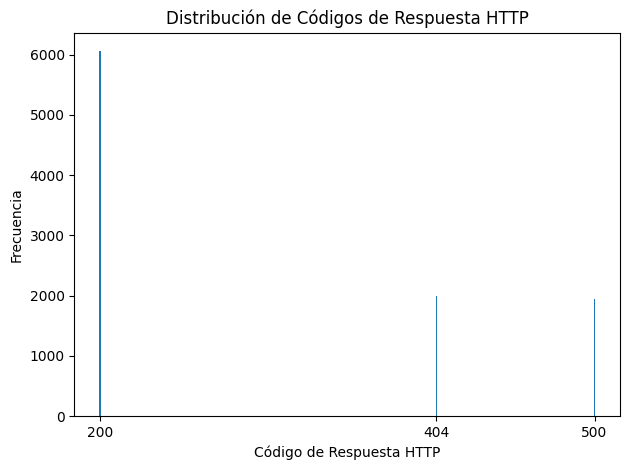

In [ ]:
import random
from collections import Counter
import matplotlib.pyplot as plt
import multiprocessing

# Generar 100 observaciones simuladas de registros de servidores
def generate_fake_logs(num_logs):
    logs = []
    for _ in range(num_logs):
        ip = f"192.168.1.{random.randint(1, 1000)}"
        http_code = random.choice([200, 200, 200, 404, 500])  # Simulación de códigos HTTP
        logs.append((ip, http_code))
    return logs

# Simular registros de servidores
fake_logs = generate_fake_logs(10000)

# Función de mapeo: extraer códigos de respuesta HTTP
def map_function(log):
    return log[1]

# Función de reducción: contar los códigos de respuesta HTTP
def reduce_function(mapped_results):
    http_counter = Counter()
    for counts in mapped_results:
        http_counter.update(counts)
    return http_counter

# Dividir los datos en fragmentos para el mapeo
def chunkify(lst, num_chunks):
    avg = len(lst) / num_chunks
    out = []
    last = 0.0

    while last < len(lst):
        out.append(lst[int(last):int(last + avg)])
        last += avg

    return out

# Número de procesos en paralelo
num_processes = 4

# Dividir los datos en fragmentos para cada proceso
chunks = chunkify(fake_logs, num_processes)

# Fase de mapeo en paralelo
def parallel_map(chunk):
    return list(map(map_function, chunk))

with multiprocessing.Pool(num_processes) as pool:
    mapped_results = pool.map(parallel_map, chunks)

# Fase de reducción en paralelo
with multiprocessing.Pool(1) as pool:
    http_counter = pool.apply(reduce_function, args=(mapped_results,))

# Imprimir códigos de respuesta HTTP más frecuentes
print("Códigos de respuesta HTTP más frecuentes:")
for code, count in http_counter.most_common(5):
    print(f"Código {code}: {count} veces")

# Visualización de la distribución de códigos de respuesta HTTP
codes, counts = zip(*http_counter.items())
plt.bar(codes, counts)
plt.xlabel('Código de Respuesta HTTP')
plt.ylabel('Frecuencia')
plt.title('Distribución de Códigos de Respuesta HTTP')
plt.xticks(list(codes))
plt.tight_layout()
plt.show()


#Cálculos de promedios

Este código simula la generación de observaciones con números aleatorios, aplica el proceso de mapeo y reducción en paralelo para calcular promedios y visualiza la distribución de los promedios calculados utilizando hilos y procesos paralelos. La combinación de módulos como `concurrent.futures` y `multiprocessing` permite aprovechar la concurrencia y el paralelismo para mejorar la eficiencia del procesamiento.
```python
import random
import concurrent.futures
import multiprocessing
import matplotlib.pyplot as plt
```

- `import random`: Importa el módulo `random`, que se utiliza para generar números aleatorios.
- `import concurrent.futures`: Importa el módulo `concurrent.futures`, que proporciona una interfaz de alto nivel para trabajar con concurrencia y paralelismo.
- `import multiprocessing`: Importa el módulo `multiprocessing`, que permite la ejecución paralela de código en varios procesos.
- `import matplotlib.pyplot as plt`: Importa el módulo `matplotlib.pyplot` bajo el alias `plt`, que se utiliza para crear gráficos y visualizaciones.

```python
def generate_fake_data(num_observations, min_value, max_value):
    data = []
    for _ in range(num_observations):
        observation = [random.uniform(min_value, max_value) for _ in range(10)]
        data.append(observation)
    return data
```

- `generate_fake_data(num_observations, min_value, max_value)`: Define una función llamada `generate_fake_data` que toma tres argumentos: `num_observations` (número de observaciones simuladas), `min_value` (valor mínimo para los números aleatorios) y `max_value` (valor máximo para los números aleatorios).
- Crea una lista vacía llamada `data` para almacenar las observaciones simuladas.
- Un bucle `for` itera `num_observations` veces. En cada iteración:
  - Se genera una observación simulada como una lista de 10 números aleatorios en el rango entre `min_value` y `max_value`.
  - La observación se agrega a la lista `data`.
- La función devuelve la lista completa de observaciones simuladas.

```python
fake_data = generate_fake_data(1000, 0, 100)
```

- Se llama a la función `generate_fake_data` con argumentos `num_observations=1000`, `min_value=0` y `max_value=100` para generar 1000 observaciones simuladas. Estas observaciones se almacenan en la variable `fake_data`.

```python
def map_function(observation):
    total = sum(observation)
    return total / len(observation)
```

- `map_function(observation)`: Define una función llamada `map_function` que toma una observación (lista de números) como argumento.
- Calcula la suma total de los números en la observación utilizando `sum(observation)` y luego divide esta suma por la longitud de la observación para obtener el promedio.
- La función devuelve el promedio de la observación.

```python
def reduce_function(averages):
    total_sum = sum(averages)
    return total_sum / len(averages)
```

- `reduce_function(averages)`: Define una función llamada `reduce_function` que toma una lista de promedios (`averages`) como argumento.
- Calcula la suma total de los promedios en la lista utilizando `sum(averages)` y luego divide esta suma por la longitud de la lista para obtener el promedio total de los promedios.
- La función devuelve el promedio total.

```python
def chunkify(lst, num_chunks):
    avg = len(lst) // num_chunks
    out = []
    last = 0
    while last < len(lst):
        out.append(lst[last:last + avg])
        last += avg
    return out
```

- `chunkify(lst, num_chunks)`: Define una función llamada `chunkify` que toma una lista `lst` y un número de fragmentos `num_chunks` como argumentos.
- Calcula el tamaño promedio de cada fragmento como la división entera de la longitud de la lista por el número de fragmentos.
- Inicializa una lista vacía `out` para almacenar los fragmentos resultantes.
- Utiliza un bucle `while` para iterar mientras la posición `last` es menor que la longitud total de la lista:
  - Agrega un fragmento de la lista `lst` desde la posición `last` hasta `last + avg` a la lista `out`.
  - Incrementa la posición `last` en el tamaño promedio de fragmento.
- La función devuelve la lista de fragmentos resultante.

```python
num_processes_map = 4
```

- Se establece la variable `num_processes_map` en `4`, que representa el número de procesos en paralelo que se utilizarán para la fase de mapeo.

```python
chunks_map = chunkify(fake_data, num_processes_map)
```

- Se llama a la función `chunkify` con los datos simulados `fake_data` y el número de procesos `num_processes_map`. Esto divide los datos en fragmentos para el procesamiento en paralelo y almacena los fragmentos en la variable `chunks_map`.

```python
parallel_map(chunk):
    return list(map(map_function, chunk))
mapped_results = []
with concurrent.futures.ThreadPoolExecutor(max_workers=num_processes_map) as executor:
    mapped_results = list(executor.map(parallel_map, chunks_map))
```

- `parallel_map(chunk)`: Define una función llamada `parallel_map` que toma un argumento `chunk`, que es un fragmento de datos simulados.
- Dentro del bloque `with`, se crea un executor de hilos (`concurrent.futures.ThreadPoolExecutor`) con el número máximo de trabajadores especificado en `max_workers=num_processes_map`.
- Utiliza el método `map` del executor de hilos para aplicar la función `parallel_map` a cada fragmento en la lista `chunks_map`. Esto realiza la fase de mapeo en paralelo utilizando hilos.
- Los resultados mapeados se almacenan en la variable `mapped_results`.

```python
mapped_results_combined = [result for chunk in mapped_results for result in chunk]
```

- Combina los resultados mapeados de los fragmentos en una sola lista llamada `mapped_results_combined` utilizando una comprensión de lista anidada.

```python
num_processes_reduce = 2
```

- Se establece la variable `num_processes_reduce` en `2`, que representa el número de procesos en paralelo que se utilizarán para la fase de reducción.

```python
chunks_reduce = chunkify(mapped_results_combined, num_processes_reduce)
```

- Se llama a la función `chunkify` con los resultados mapeados combinados `mapped_results_combined` y el número de procesos `num_processes_reduce`. Esto divide los resultados en fragmentos para el procesamiento en paralelo en la fase de reducción y almacena los fragmentos en la variable `chunks_reduce`.

```python
parallel_reduce(chunk):
    return reduce_function(chunk)
with multiprocessing.Pool(num_processes_reduce) as pool:
    reduced_results = pool.map(parallel_reduce, chunks_reduce)
```

- `parallel_reduce(chunk)`: Define una función llamada `parallel_reduce` que toma un argumento `chunk`, que es un fragmento de resultados mapeados combinados.
- Dentro del bloque `with`, se crea un grupo de procesos (`multiprocessing.Pool`) con el número de procesos especificado en `num_processes_reduce`.
- Utiliza el método `map` del grupo de procesos para aplicar la función `parallel_reduce` a cada fragmento en la lista `chunks_reduce`. Esto realiza la fase de reducción en paralelo utilizando procesos.
- Los resultados reducidos se almacenan en la variable `reduced_results`.

```python
final_average = reduce_function(reduced_results)
```

- Calcula el promedio total utilizando la función `reduce_function` y los resultados reducidos almacenados en `reduced_results`. El resultado se almacena en la variable `final_average`.

```python
print("Promedio total:", final_average)
```

- Imprime el promedio total calculado utilizando la variable `final_average`.

```python
plt.hist(mapped_results_combined, bins=30, edgecolor='black')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Promedios Calculados')
plt.tight_layout()
plt.show()
```

- Utiliza la función `plt.hist` para crear un histograma de los resultados mapeados combinados (`mapped_results_combined`). `bins=30` especifica el número de intervalos en el histograma y `edgecolor='black'` establece el color del borde de las barras.
- Agrega etiquetas al eje X y al eje Y utilizando `plt.xlabel` y `plt.ylabel`.
- Establece un título para el gráfico utilizando `plt.title`.
- `plt.tight_layout()` se utiliza para mejorar la disposición del gráfico.
- `plt.show()` se llama para mostrar el gráfico.



In [ ]:
# Generar miles de observaciones simuladas con números aleatorios
def generate_fake_data(num_observations, min_value, max_value):
    data = []
    for _ in range(num_observations):
        observation = [random.uniform(min_value, max_value) for _ in range(10)]  # 10 números por observación
        data.append(observation)
    return data

# Generar miles de observaciones con números aleatorios
fake_data = generate_fake_data(10000000, 0, 100)

Promedio total: 50.00067156495231


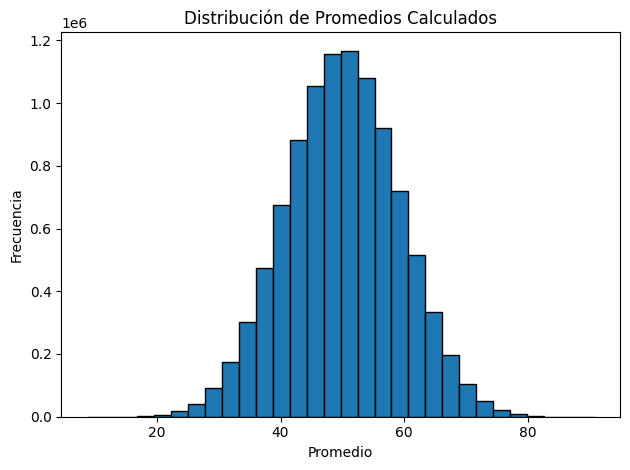

In [ ]:
import random
import concurrent.futures
import multiprocessing
import matplotlib.pyplot as plt



# Función de mapeo: calcular el promedio de una observación
def map_function(observation):
    total = sum(observation)
    return total / len(observation)

# Función de reducción: calcular el promedio total
def reduce_function(averages):
    total_sum = sum(averages)
    return total_sum / len(averages)

# Dividir los datos en fragmentos para el mapeo en paralelo
def chunkify(lst, num_chunks):
    avg = len(lst) // num_chunks
    out = []
    last = 0

    while last < len(lst):
        out.append(lst[last:last + avg])
        last += avg

    return out



# Número de procesos en paralelo para la fase de mapeo
num_processes_map = 4

# Dividir los datos en fragmentos para cada proceso de mapeo
chunks_map = chunkify(fake_data, num_processes_map)

# Fase de mapeo en paralelo
def parallel_map(chunk):
    return list(map(map_function, chunk))

mapped_results = []
with concurrent.futures.ThreadPoolExecutor(max_workers=num_processes_map) as executor:
    mapped_results = list(executor.map(parallel_map, chunks_map))

# Combina los resultados mapeados de los fragmentos
mapped_results_combined = [result for chunk in mapped_results for result in chunk]

# Número de procesos en paralelo para la fase de reducción
num_processes_reduce = 2

# Dividir los resultados mapeados en fragmentos para cada proceso de reducción
chunks_reduce = chunkify(mapped_results_combined, num_processes_reduce)

# Fase de reducción en paralelo
def parallel_reduce(chunk):
    return reduce_function(chunk)

with multiprocessing.Pool(num_processes_reduce) as pool:
    reduced_results = pool.map(parallel_reduce, chunks_reduce)

# Fase final de reducción para calcular el promedio total
final_average = reduce_function(reduced_results)

# Imprimir el promedio total
print("Promedio total:", final_average)

# Visualización de la distribución de promedios calculados
plt.hist(mapped_results_combined, bins=30, edgecolor='black')
plt.xlabel('Promedio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Promedios Calculados')
plt.tight_layout()
plt.show()


# Conteo de números

Este código simula la generación de números aleatorios, realiza operaciones de mapeo y reducción en paralelo para clasificar y contar números en diferentes categorías, y visualiza los resultados mediante gráficos. Se utiliza concurrencia y procesos paralelos para mejorar la eficiencia del procesamiento.


```python
import random
import concurrent.futures
import multiprocessing
import matplotlib.pyplot as plt
```

- Se importan los módulos `random`, `concurrent.futures`, `multiprocessing` y `matplotlib.pyplot` para generar números aleatorios, trabajar con concurrencia/paralelismo, realizar cálculos en paralelo y crear visualizaciones, respectivamente.

```python
def generate_fake_data(num_numbers, min_value, max_value):
    data = [random.randint(min_value, max_value) for _ in range(num_numbers)]
    return data
```

- Se define la función `generate_fake_data(num_numbers, min_value, max_value)` que genera una lista de números aleatorios dentro de un rango determinado.
- Utiliza una comprensión de lista para crear la lista `data` con `num_numbers` elementos, donde cada elemento es un número aleatorio entre `min_value` y `max_value`.

```python
def map_function(number):
    if number % 2 == 0:
        return ("Pares", number)
    else:
        return ("Impares", number)
```

- Se define la función `map_function(number)` que clasifica los números en "Pares" e "Impares" según su paridad.
- Si el número es divisible por 2 (su residuo al dividir por 2 es 0), se devuelve una tupla con la categoría "Pares" y el número.
- Si el número no es divisible por 2 (su residuo al dividir por 2 no es 0), se devuelve una tupla con la categoría "Impares" y el número.

```python
def reduce_function(category_numbers):
    categories = {}
    for category, number in category_numbers:
        if category not in categories:
            categories[category] = []
        categories[category].append(number)
    return categories
```

- Se define la función `reduce_function(category_numbers)` que agrupa los números por categoría.
- `category_numbers` es una lista de tuplas donde cada tupla contiene una categoría y un número.
- Se utiliza un diccionario `categories` para agrupar los números por categoría.
- Se itera a través de las tuplas, y para cada categoría se agrega el número correspondiente a la lista de números en esa categoría en el diccionario `categories`.

```python
def chunkify(lst, num_chunks):
    avg = len(lst) // num_chunks
    out = []
    last = 0
    while last < len(lst):
        out.append(lst[last:last + avg])
        last += avg
    return out
```

- Se define la función `chunkify(lst, num_chunks)` para dividir una lista en fragmentos para el procesamiento paralelo.
- Calcula el tamaño promedio de cada fragmento como la división entera de la longitud de la lista por el número de fragmentos.
- Utiliza un bucle `while` para iterar a través de la lista y crear fragmentos de tamaño `avg`, agregándolos a la lista `out`.

```python
def is_prime(number):
    if number <= 1:
        return False
    if number <= 3:
        return True
    if number % 2 == 0 or number % 3 == 0:
        return False
    i = 5
    while i * i <= number:
        if number % i == 0 or number % (i + 2) == 0:
            return False
        i += 6
    return True
```

- Se define la función `is_prime(number)` para verificar si un número es primo.
- Se implementa el algoritmo de optimización "Prueba de divisibilidad" para determinar si un número es primo.
- El algoritmo verifica divisibilidad por 2 y 3, y luego utiliza un bucle para verificar divisibilidad por otros números impares.

```python
def map_function_prime(number):
    if is_prime(number):
        return ("Primos", 1)
    else:
        return ("No Primos", 1)
```

- Se define la función `map_function_prime(number)` para clasificar los números en "Primos" y "No Primos" y contarlos.
- Si el número es primo, se devuelve una tupla con la categoría "Primos" y un contador igual a 1.
- Si el número no es primo, se devuelve una tupla con la categoría "No Primos" y un contador igual a 1.

```python
def reduce_function_prime(category_counts):
    categories = {}
    for category, count in category_counts:
        if category not in categories:
            categories[category] = 0
        categories[category] += count
    return categories
```

- Se define la función `reduce_function_prime(category_counts)` para contar la cantidad de números primos y no primos.
- `category_counts` es una lista de tuplas donde cada tupla contiene una categoría y un contador.
- Utiliza un diccionario `categories` para almacenar y acumular los conteos por categoría.

```python
fake_data = generate_fake_data(1000, 1, 100)
```

- Se llama a `generate_fake_data` para crear una lista de 1000 números aleatorios entre 1 y 100.

```python
num_processes_map = 4
```

- Se establece el número de procesos en paralelo para la fase de mapeo en `num_processes_map`.

```python
chunks_map = chunkify(fake_data, num_processes_map)
```

- Se llama a `chunkify` para dividir los datos en fragmentos para el mapeo en paralelo.

```python
def parallel_map(chunk):
    return list(map(map_function, chunk))
mapped_results = []
with concurrent.futures.ThreadPoolExecutor(max_workers=num_processes_map) as executor:
    mapped_results = list(executor.map(parallel_map, chunks_map))
```

- Se define la función `parallel_map(chunk)` para ejecutar la fase de mapeo en paralelo.
- Dentro del bloque `with`, se crea un executor de hilos con el número máximo de trabajadores especificado.
- Se utiliza `executor.map` para aplicar `parallel_map` a cada fragmento en los datos, obteniendo resultados mapeados.

```python
mapped_results_combined = [result for chunk in mapped_results for result in chunk]
```

- Se combinan los resultados mapeados de los fragmentos en una sola lista.

```python
num_processes_reduce = 2
```

- Se establece el número de procesos en paralelo para la fase de reducción en `num_processes_reduce`.

```python
chunks_reduce = chunkify(mapped_results_combined, num_processes_reduce)
```

- Se llama a `chunkify` para dividir los resultados mapeados en fragmentos para la fase de reducción.

```python
def parallel_reduce(chunk):
    return reduce_function(chunk)
with multiprocessing.Pool(num_processes_reduce) as pool:
    reduced_results = pool.map(parallel_reduce, chunks_reduce)
```

- Se define la función `parallel_reduce(chunk)` para ejecutar

 la fase de reducción en paralelo.
- Dentro del bloque `with`, se crea un grupo de procesos con el número de procesos especificado.
- Se utiliza `pool.map` para aplicar `parallel_reduce` a cada fragmento en los resultados, obteniendo resultados reducidos.

```python
final_categories = {}
for categories in reduced_results:
    for category, numbers in categories.items():
        if category not in final_categories:
            final_categories[category] = []
        final_categories[category].extend(numbers)
```

- Se combina y acumula los resultados reducidos de la fase de reducción en un diccionario `final_categories`.

```python
for category, numbers in final_categories.items():
    print(f"{category}: {numbers}")
```

- Se imprimen las categorías y los números correspondientes.

```python
categories_parity = list(final_categories.keys())
num_counts_parity = [len(final_categories[category]) for category in categories_parity]
plt.bar(categories_parity, num_counts_parity, color=['blue', 'orange'])
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Números')
plt.title('Cantidad de Números Pares e Impares')
plt.tight_layout()
plt.show()
```

- Se crean visualizaciones de la cantidad de números pares e impares utilizando `matplotlib.pyplot`.

```python
num_processes_map_prime = 4
chunks_map_prime = chunkify(fake_data, num_processes_map_prime)
```

- Se establece el número de procesos en paralelo para la fase de mapeo de números primos y no primos, y se dividen los datos en fragmentos.

```python
def parallel_map_prime(chunk):
    return list(map(map_function_prime, chunk))
mapped_results_prime = []
with concurrent.futures.ThreadPoolExecutor(max_workers=num_processes_map_prime) as executor:
    mapped_results_prime = list(executor.map(parallel_map_prime, chunks_map_prime))
mapped_results_combined_prime = [result for chunk in mapped_results_prime for result in chunk]
```

- Se define la función `parallel_map_prime(chunk)` y se ejecuta la fase de mapeo en paralelo para contar números primos y no primos.
- Se combinan los resultados mapeados de los fragmentos en una lista.

```python
num_processes_reduce_prime = 2
chunks_reduce_prime = chunkify(mapped_results_combined_prime, num_processes_reduce_prime)
```

- Se establece el número de procesos en paralelo para la fase de reducción de números primos y no primos, y se dividen los resultados mapeados en fragmentos.

```python
def parallel_reduce_prime(chunk):
    return reduce_function_prime(chunk)
with multiprocessing.Pool(num_processes_reduce_prime) as pool:
    reduced_results_prime = pool.map(parallel_reduce_prime, chunks_reduce_prime)
```

- Se define la función `parallel_reduce_prime(chunk)` y se ejecuta la fase de reducción en paralelo para contar números primos y no primos.

```python
final_counts_prime = {}
for counts in reduced_results_prime:
    for category, count in counts.items():
        if category not in final_counts_prime:
            final_counts_prime[category] = 0
        final_counts_prime[category] += count
```

- Se combinan y acumulan los resultados reducidos de la fase de reducción de números primos y no primos en un diccionario.

```python
for category, count in final_counts_prime.items():
    print(f"{category}: {count}")
```

- Se imprimen los conteos de números primos y no primos.

```python
categories_prime = list(final_counts_prime.keys())
num_counts_prime = [final_counts_prime[category] for category in categories_prime]
plt.bar(categories_prime, num_counts_prime, color=['green', 'red'])
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Números')
plt.title('Cantidad de Números Primos y No Primos')
plt.tight_layout()
plt.show()
```

- Se crean visualizaciones de la cantidad de números primos y no primos utilizando `matplotlib.pyplot`.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



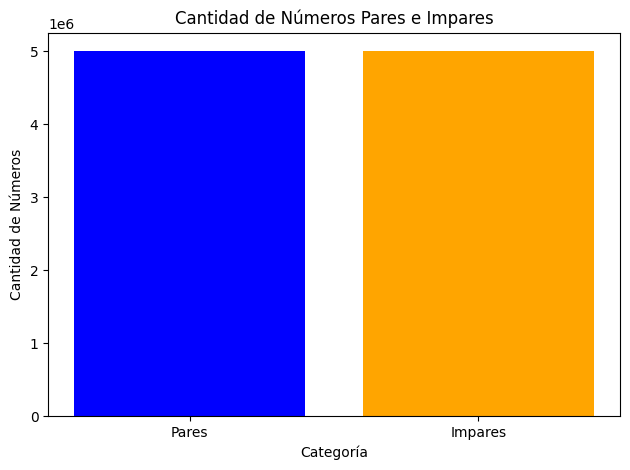

No Primos: 7498735
Primos: 2501265


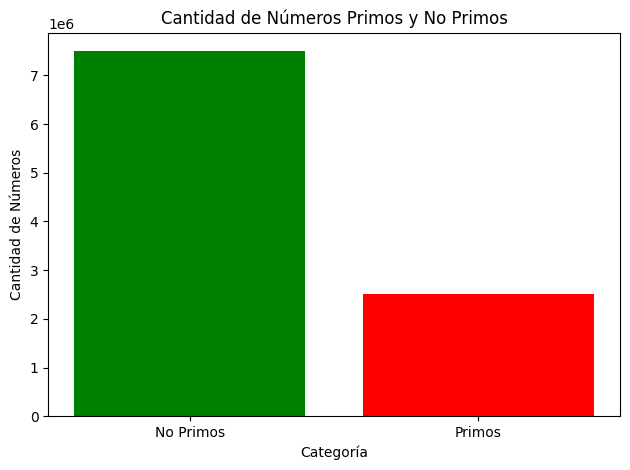

In [ ]:
import random
import concurrent.futures
import multiprocessing
import matplotlib.pyplot as plt

# Generar miles de números aleatorios simulados
def generate_fake_data(num_numbers, min_value, max_value):
    data = [random.randint(min_value, max_value) for _ in range(num_numbers)]
    return data

# Función de mapeo: clasificar números en pares e impares
def map_function(number):
    if number % 2 == 0:
        return ("Pares", number)
    else:
        return ("Impares", number)

# Función de reducción: clasificar los números en categorías
def reduce_function(category_numbers):
    categories = {}
    for category, number in category_numbers:
        if category not in categories:
            categories[category] = []
        categories[category].append(number)
    return categories

# Dividir los datos en fragmentos para el mapeo en paralelo
def chunkify(lst, num_chunks):
    avg = len(lst) // num_chunks
    out = []
    last = 0

    while last < len(lst):
        out.append(lst[last:last + avg])
        last += avg

    return out

# Función para verificar si un número es primo
def is_prime(number):
    if number <= 1:
        return False
    if number <= 3:
        return True
    if number % 2 == 0 or number % 3 == 0:
        return False
    i = 5
    while i * i <= number:
        if number % i == 0 or number % (i + 2) == 0:
            return False
        i += 6
    return True

# Función de mapeo: contar números primos y no primos
def map_function_prime(number):
    if is_prime(number):
        return ("Primos", 1)
    else:
        return ("No Primos", 1)

# Función de reducción: contar números primos y no primos
def reduce_function_prime(category_counts):
    categories = {}
    for category, count in category_counts:
        if category not in categories:
            categories[category] = 0
        categories[category] += count
    return categories

# Generar miles de números aleatorios simulados
fake_data = generate_fake_data(10000000, 1, 100)

# Número de procesos en paralelo para la fase de mapeo
num_processes_map = 4

# Dividir los datos en fragmentos para cada proceso de mapeo
chunks_map = chunkify(fake_data, num_processes_map)

# Fase de mapeo en paralelo
def parallel_map(chunk):
    return list(map(map_function, chunk))

mapped_results = []
with concurrent.futures.ThreadPoolExecutor(max_workers=num_processes_map) as executor:
    mapped_results = list(executor.map(parallel_map, chunks_map))

# Combina los resultados mapeados de los fragmentos
mapped_results_combined = [result for chunk in mapped_results for result in chunk]

# Número de procesos en paralelo para la fase de reducción
num_processes_reduce = 2

# Dividir los resultados mapeados en fragmentos para cada proceso de reducción
chunks_reduce = chunkify(mapped_results_combined, num_processes_reduce)

# Fase de reducción en paralelo
def parallel_reduce(chunk):
    return reduce_function(chunk)

with multiprocessing.Pool(num_processes_reduce) as pool:
    reduced_results = pool.map(parallel_reduce, chunks_reduce)

# Fase final de reducción para combinar los resultados reducidos
final_categories = {}
for categories in reduced_results:
    for category, numbers in categories.items():
        if category not in final_categories:
            final_categories[category] = []
        final_categories[category].extend(numbers)

# Imprimir la clasificación de números por categoría
for category, numbers in final_categories.items():
    print(f"{category}: {numbers}")

# Visualización de la cantidad de números pares e impares
categories_parity = list(final_categories.keys())
num_counts_parity = [len(final_categories[category]) for category in categories_parity]

plt.bar(categories_parity, num_counts_parity, color=['blue', 'orange'])
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Números')
plt.title('Cantidad de Números Pares e Impares')
plt.tight_layout()
plt.show()

# Fase de mapeo en paralelo para contar números primos y no primos
num_processes_map_prime = 4

chunks_map_prime = chunkify(fake_data, num_processes_map_prime)

def parallel_map_prime(chunk):
    return list(map(map_function_prime, chunk))

mapped_results_prime = []
with concurrent.futures.ThreadPoolExecutor(max_workers=num_processes_map_prime) as executor:
    mapped_results_prime = list(executor.map(parallel_map_prime, chunks_map_prime))

mapped_results_combined_prime = [result for chunk in mapped_results_prime for result in chunk]

# Número de procesos en paralelo para la fase de reducción de números primos y no primos
num_processes_reduce_prime = 2

chunks_reduce_prime = chunkify(mapped_results_combined_prime, num_processes_reduce_prime)

# Fase de reducción en paralelo para contar números primos y no primos
def parallel_reduce_prime(chunk):
    return reduce_function_prime(chunk)

with multiprocessing.Pool(num_processes_reduce_prime) as pool:
    reduced_results_prime = pool.map(parallel_reduce_prime, chunks_reduce_prime)

# Fase final de reducción para combinar los resultados reducidos de números primos y no primos
final_counts_prime = {}
for counts in reduced_results_prime:
    for category, count in counts.items():
        if category not in final_counts_prime:
            final_counts_prime[category] = 0
        final_counts_prime[category] += count

# Imprimir el conteo de números primos y no primos
for category, count in final_counts_prime.items():
    print(f"{category}: {count}")

# Visualización del conteo de números primos y no primos
categories_prime = list(final_counts_prime.keys())
num_counts_prime = [final_counts_prime[category] for category in categories_prime]

plt.bar(categories_prime, num_counts_prime, color=['green', 'red'])
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Números')
plt.title('Cantidad de Números Primos y No Primos')
plt.tight_layout()
plt.show()


# Clasificación de datos

Este código simula el procesamiento en paralelo de una lista de números aleatorios. Se utilizan funciones de mapeo y reducción para clasificar y agrupar los números en categorías, y se visualizan los resultados utilizando gráficos de barras. El código aprovecha la concurrencia y el paralelismo para mejorar la eficiencia del procesamiento.

```python
import random
import concurrent.futures
import multiprocessing
import matplotlib.pyplot as plt
```

- Se importan los módulos necesarios: `random` para generar números aleatorios, `concurrent.futures` para trabajar con concurrencia, `multiprocessing` para procesos paralelos y `matplotlib.pyplot` para crear visualizaciones.

```python
def generate_random_numbers(num_numbers, min_value, max_value):
    return [random.randint(min_value, max_value) for _ in range(num_numbers)]
```

- Se define la función `generate_random_numbers` que genera una lista de `num_numbers` números aleatorios dentro del rango entre `min_value` y `max_value`.
- Utiliza una comprensión de lista para crear la lista de números aleatorios.

```python
def map_function(number):
    if number >= 50:
        return ("Mayores o Iguales a 50", number)
    else:
        return ("Menores a 50", number)
```

- Se define la función `map_function` que clasifica los números en dos categorías: "Mayores o Iguales a 50" y "Menores a 50".
- Si el número es mayor o igual a 50, devuelve una tupla con la categoría "Mayores o Iguales a 50" y el número.
- Si el número es menor a 50, devuelve una tupla con la categoría "Menores a 50" y el número.

```python
def reduce_function(category_numbers):
    categories = {}
    for category, number in category_numbers:
        if category not in categories:
            categories[category] = []
        categories[category].append(number)
    return categories
```

- Se define la función `reduce_function` que agrupa los números por categoría.
- `category_numbers` es una lista de tuplas donde cada tupla contiene una categoría y un número.
- Utiliza un diccionario `categories` para agrupar los números por categoría.

```python
def chunkify(lst, num_chunks):
    avg = len(lst) // num_chunks
    out = []
    last = 0
    while last < len(lst):
        out.append(lst[last:last + avg])
        last += avg
    return out
```

- Se define la función `chunkify` que divide una lista `lst` en fragmentos para procesamiento paralelo.
- Calcula el tamaño promedio de cada fragmento como la división entera de la longitud de la lista por el número de fragmentos.
- Utiliza un bucle `while` para iterar a través de la lista y crear fragmentos de tamaño `avg`.

```python
random_numbers = generate_random_numbers(1000, 1, 200)
```

- Se llama a `generate_random_numbers` para crear una lista de 1000 números aleatorios entre 1 y 200.

```python
num_processes_map = 4
```

- Se establece el número de procesos en paralelo para la fase de mapeo en `num_processes_map`.

```python
chunks_map = chunkify(random_numbers, num_processes_map)
```

- Se llama a `chunkify` para dividir los números aleatorios en fragmentos para el mapeo en paralelo.

```python
parallel_map(chunk):
    return list(map(map_function, chunk))
mapped_results = []
with concurrent.futures.ThreadPoolExecutor(max_workers=num_processes_map) as executor:
    mapped_results = list(executor.map(parallel_map, chunks_map))
```

- Se define la función `parallel_map(chunk)` para ejecutar la fase de mapeo en paralelo.
- Dentro del bloque `with`, se crea un executor de hilos con el número máximo de trabajadores especificado.
- Se utiliza `executor.map` para aplicar `parallel_map` a cada fragmento en los datos y obtener resultados mapeados.

```python
mapped_results_combined = [result for chunk in mapped_results for result in chunk]
```

- Se combinan los resultados mapeados de los fragmentos en una sola lista.

```python
num_processes_reduce = 2
```

- Se establece el número de procesos en paralelo para la fase de reducción en `num_processes_reduce`.

```python
chunks_reduce = chunkify(mapped_results_combined, num_processes_reduce)
```

- Se llama a `chunkify` para dividir los resultados mapeados en fragmentos para la fase de reducción.

```python
parallel_reduce(chunk):
    return reduce_function(chunk)
with multiprocessing.Pool(num_processes_reduce) as pool:
    reduced_results = pool.map(parallel_reduce, chunks_reduce)
```

- Se define la función `parallel_reduce(chunk)` para ejecutar la fase de reducción en paralelo.
- Dentro del bloque `with`, se crea un grupo de procesos con el número de procesos especificado.
- Se utiliza `pool.map` para aplicar `parallel_reduce` a cada fragmento en los resultados y obtener resultados reducidos.

```python
final_categories = {}
for categories in reduced_results:
    for category, numbers in categories.items():
        if category not in final_categories:
            final_categories[category] = []
        final_categories[category].extend(numbers)
```

- Se combinan y acumulan los resultados reducidos de la fase de reducción en un diccionario `final_categories`.

```python
categories = list(final_categories.keys())
num_counts = [len(final_categories[category]) for category in categories]
plt.bar(categories, num_counts, color=['blue', 'orange'])
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Números')
plt.title('Filtrado de Números Mayores o Iguales a 50')
plt.tight_layout()
plt.show()
```

- Se crean visualizaciones de los resultados del filtrado utilizando `matplotlib.pyplot`.
- Se muestra un gráfico de barras con las categorías en el eje X y la cantidad de números en el eje Y.
- Se establecen etiquetas para los ejes X e Y, así como un título para el gráfico.
- Se llama a `plt.tight_layout()` para ajustar la disposición del gráfico.
- Finalmente, se muestra el gráfico utilizando `plt.show()`.




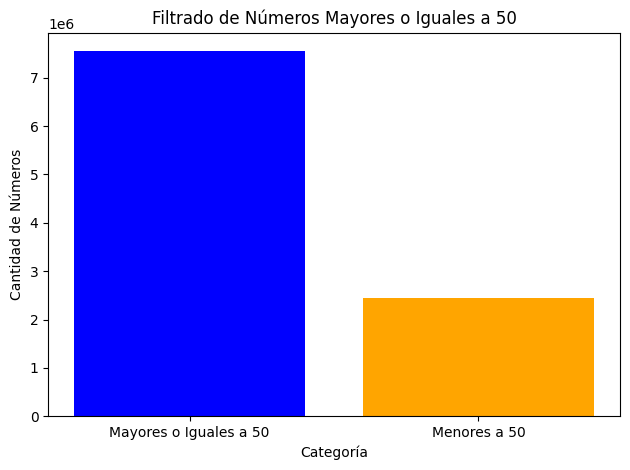

In [ ]:
import random
import concurrent.futures
import multiprocessing
import matplotlib.pyplot as plt

# Generar una lista de números aleatorios
def generate_random_numbers(num_numbers, min_value, max_value):
    return [random.randint(min_value, max_value) for _ in range(num_numbers)]

# Función de mapeo: filtrar números mayores o iguales a 50
def map_function(number):
    if number >= 50:
        return ("Mayores o Iguales a 50", number)
    else:
        return ("Menores a 50", number)

# Función de reducción: agrupar números por categoría
def reduce_function(category_numbers):
    categories = {}
    for category, number in category_numbers:
        if category not in categories:
            categories[category] = []
        categories[category].append(number)
    return categories

# Dividir los datos en fragmentos para el mapeo en paralelo
def chunkify(lst, num_chunks):
    avg = len(lst) // num_chunks
    out = []
    last = 0

    while last < len(lst):
        out.append(lst[last:last + avg])
        last += avg

    return out

# Generar una lista de números aleatorios
random_numbers = generate_random_numbers(10000000, 1, 200)

# Número de procesos en paralelo para la fase de mapeo
num_processes_map = 4

# Dividir los datos en fragmentos para cada proceso de mapeo
chunks_map = chunkify(random_numbers, num_processes_map)

# Fase de mapeo en paralelo
def parallel_map(chunk):
    return list(map(map_function, chunk))

mapped_results = []
with concurrent.futures.ThreadPoolExecutor(max_workers=num_processes_map) as executor:
    mapped_results = list(executor.map(parallel_map, chunks_map))

# Combina los resultados mapeados de los fragmentos
mapped_results_combined = [result for chunk in mapped_results for result in chunk]

# Número de procesos en paralelo para la fase de reducción
num_processes_reduce = 2

# Dividir los resultados mapeados en fragmentos para cada proceso de reducción
chunks_reduce = chunkify(mapped_results_combined, num_processes_reduce)

# Fase de reducción en paralelo
def parallel_reduce(chunk):
    return reduce_function(chunk)

with multiprocessing.Pool(num_processes_reduce) as pool:
    reduced_results = pool.map(parallel_reduce, chunks_reduce)

# Fase final de reducción para combinar los resultados reducidos
final_categories = {}
for categories in reduced_results:
    for category, numbers in categories.items():
        if category not in final_categories:
            final_categories[category] = []
        final_categories[category].extend(numbers)

# Visualización del resultado del filtrado
categories = list(final_categories.keys())
num_counts = [len(final_categories[category]) for category in categories]

plt.bar(categories, num_counts, color=['blue', 'orange'])
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Números')
plt.title('Filtrado de Números Mayores o Iguales a 50')
plt.tight_layout()
plt.show()


#Recomendaciones Personalizadas

Este código muestra cómo calcular similitudes entre perfiles de preferencias de usuarios, generar recomendaciones personalizadas y visualizar estas recomendaciones en un gráfico de barras. Además, utiliza técnicas de procesamiento paralelo para optimizar el rendimiento en estas operaciones.


```python
import random
import concurrent.futures
import multiprocessing
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
```

- Se importan los módulos necesarios: `random` para generar números aleatorios, `concurrent.futures` para trabajar con concurrencia, `multiprocessing` para procesos paralelos, `numpy` para cálculos numéricos y `cosine_similarity` de `sklearn.metrics.pairwise` para calcular similitudes coseno, y `matplotlib.pyplot` para crear visualizaciones.

```python
num_users = 10
num_items = 12  # aumentado de 8 a 12 para diversidad
```

- Se definen el número de usuarios y elementos (ítems) en el sistema. Se ha aumentado el número de ítems para mayor diversidad.

```python
users = [f"User_{i+1}" for i in range(num_users)]
items = ["Libro", "Película", "Juego", "Música", "Arte", "Teatro", "Concierto", "Museo", "Parque", "Restaurante", "Gimnasio", "Playa"]
```

- Se generan nombres de usuarios y una lista de nombres de ítems.

```python
preferences = np.random.randint(1, 6, size=(num_users, num_items))
```

- Se generan perfiles de preferencias aleatorias para los usuarios. Cada preferencia es un número entero aleatorio entre 1 y 5. Esto crea una matriz `num_users` x `num_items`.

```python
def chunkify(lst, num_chunks):
    avg = len(lst) // num_chunks
    out = []
    last = 0
    while last < len(lst):
        out.append(lst[last:last + avg])
        last += avg
    return out
```

- Se define la función `chunkify` que divide una lista en fragmentos para procesamiento paralelo.
- Calcula el tamaño promedio de cada fragmento como la división entera de la longitud de la lista por el número de fragmentos.
- Utiliza un bucle `while` para iterar a través de la lista y crear fragmentos de tamaño `avg`.

```python
def map_function(chunk):
    results = []
    for user_index, user in enumerate(chunk):
        user_preferences = preferences[user_index]
        similarity_scores = cosine_similarity([user_preferences], preferences)[0]
        results.append((user, similarity_scores))
    return results
```

- Se define la función `map_function` que calcula las similitudes coseno entre el perfil de preferencias de un usuario y los perfiles de preferencias de todos los usuarios.
- Utiliza `enumerate` para obtener tanto el índice como el nombre de usuario en el fragmento.
- Calcula las similitudes coseno entre el perfil de preferencias del usuario actual y todos los perfiles de preferencias. El resultado es una lista de similitudes.
- Devuelve una lista de tuplas que contienen el nombre del usuario y las similitudes.

```python
def reduce_function(result_chunks):
    combined_results = {}
    for result_chunk in result_chunks:
        for user, similarity_scores in result_chunk:
            combined_results[user] = similarity_scores
    return combined_results
```

- Se define la función `reduce_function` que combina los resultados de similitud de diferentes fragmentos.
- Combina las similitudes de los usuarios en un diccionario donde la clave es el nombre del usuario y el valor es la lista de similitudes.

```python
num_processes_map = 4
```

- Se establece el número de procesos en paralelo para la fase de mapeo en `num_processes_map`.

```python
chunks_map = chunkify(users, num_processes_map)
```

- Se llama a `chunkify` para dividir los nombres de usuarios en fragmentos para el mapeo en paralelo.

```python
parallel_map(chunk):
    return map_function(chunk)
mapped_results = []
with concurrent.futures.ThreadPoolExecutor(max_workers=num_processes_map) as executor:
    mapped_results = list(executor.map(parallel_map, chunks_map))
```

- Se define la función `parallel_map(chunk)` para ejecutar la fase de mapeo en paralelo.
- Dentro del bloque `with`, se crea un executor de hilos con el número máximo de trabajadores especificado.
- Se utiliza `executor.map` para aplicar `parallel_map` a cada fragmento en los nombres de usuarios y obtener resultados mapeados.

```python
combined_results = reduce_function(mapped_results)
```

- Se llama a `reduce_function` para combinar los resultados mapeados de similitud en un solo diccionario.

```python
def generate_recommendations(user, items, similarities):
    user_index = users.index(user)
    user_preferences = preferences[user_index]
    scores = np.zeros(len(items))
    for other_user, similarity in enumerate(similarities[user]):
        if other_user == user_index:
            continue
        scores += similarity * preferences[other_user]
    recommendations = [(item, score) for item, score in zip(items, scores) if user_preferences[items.index(item)] == 0]
    return sorted(recommendations, key=lambda x: x[1], reverse=True)
```

- Se define la función `generate_recommendations` que genera recomendaciones personalizadas para un usuario en función de las similitudes calculadas.
- Obtiene el índice del usuario actual y su perfil de preferencias.
- Calcula los puntajes de recomendación sumando las preferencias ponderadas de otros usuarios según sus similitudes coseno.
- Filtra las recomendaciones para incluir solo los ítems que el usuario no ha calificado previamente (preferencia igual a 0).
- Devuelve una lista de tuplas con ítems recomendados y sus puntajes.

```python
num_processes_recommend = 2
```

- Se establece el número de procesos en paralelo para la fase de recomendación en `num_processes_recommend`.

```python
chunks_recommend = chunkify(users, num_processes_recommend)
```

- Se llama a `chunkify` para dividir los nombres de usuarios en fragmentos para la fase de recomendación.

```python
parallel_recommend(chunk):
    return {user: generate_recommendations(user, items, combined_results) for user in chunk}
with multiprocessing.Pool(num_processes_recommend) as pool:
    recommendation_results = pool.map(parallel_recommend, chunks_recommend)
```

- Se define la función `parallel_recommend(chunk)` para ejecutar la fase de recomendación en paralelo.
- Dentro del bloque `with`, se crea un grupo de procesos con el número de procesos especificado.
- Se utiliza `pool.map` para aplicar `parallel_recommend` a cada fragmento en los nombres de usuarios y obtener resultados de recomendación.

```python
final_recommendations = {}
for recommendation_result in recommendation_results:
    final_recommendations.update(recommendation_result)
```

- Se combinan y acumulan los resultados de recomendación en un diccionario `final_recommendations`.

```python
user_to_visualize = "User_1"
if final_recommendations[user_to_visualize]:
    recommended_items, recommendation_scores = zip(*final_recommendations[user_to_visualize])
    plt.bar(recommended_items, recommendation_scores, color='green')
    plt.xlabel('Ítem')
    plt.ylabel('Puntaje de Recomendación')
    plt.title(f'Recomendaciones para {user_to_visualize}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"No hay recomendaciones disponibles para {user_to_visualize}.")
```

- Se selecciona un usuario específico para visualizar sus recomendaciones. Si hay recomendaciones para ese usuario, se extraen los ítems recomendados y sus puntajes.
- Se crea un gráfico de barras con los ítems recomendados en el eje X y los puntajes de recomendación en el eje Y.
- Se establecen etiquetas para los ejes X e Y, así como un título para el gráfico.
- Se rota el texto en el eje X para mejorar la legibilidad.
- Se llama a `plt.tight_layout()` para ajustar la disposición del gráfico.
- Se muestra el gráfico utilizando `plt.show()`. Si no hay recomendaciones para el usuario, se imprime un mensaje indicando que no hay recomendaciones disponibles.


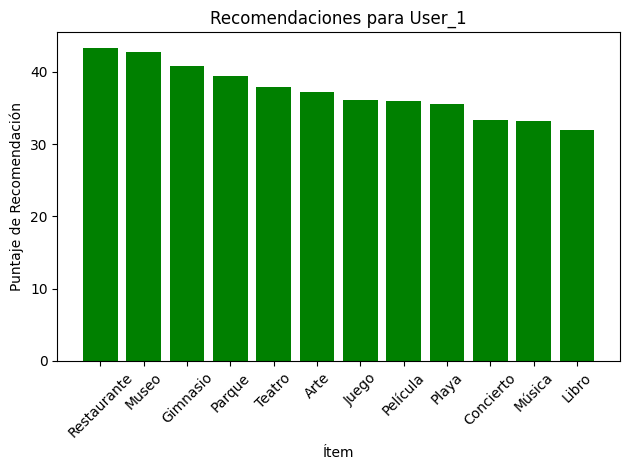

In [ ]:
import random
import concurrent.futures
import multiprocessing
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Generar datos simulados
num_users = 15
num_items = 12  # aumentado de 8 a 12 para diversidad

users = [f"User_{i+1}" for i in range(num_users)]
items = ["Libro", "Película", "Juego", "Música", "Arte", "Teatro", "Concierto", "Museo", "Parque", "Restaurante", "Gimnasio", "Playa"]

# Generar perfiles de preferencias aleatorias para los usuarios
preferences = np.random.randint(1, 6, size=(num_users, num_items))

# Dividir los datos en fragmentos para el mapeo en paralelo
def chunkify(lst, num_chunks):
    avg = len(lst) // num_chunks
    out = []
    last = 0

    while last < len(lst):
        out.append(lst[last:last + avg])
        last += avg

    return out

# Función de mapeo: calcular similitudes entre usuarios
def map_function(chunk):
    results = []
    for user_index, user in enumerate(chunk):
        user_preferences = preferences[user_index]
        similarity_scores = cosine_similarity([user_preferences], preferences)[0]
        results.append((user, similarity_scores))
    return results

# Función de reducción: combinar los resultados de similitud
def reduce_function(result_chunks):
    combined_results = {}
    for result_chunk in result_chunks:
        for user, similarity_scores in result_chunk:
            combined_results[user] = similarity_scores
    return combined_results

# Número de procesos en paralelo para la fase de mapeo
num_processes_map = 4

# Dividir los usuarios en fragmentos para cada proceso de mapeo
chunks_map = chunkify(users, num_processes_map)

# Fase de mapeo en paralelo
def parallel_map(chunk):
    return map_function(chunk)

mapped_results = []
with concurrent.futures.ThreadPoolExecutor(max_workers=num_processes_map) as executor:
    mapped_results = list(executor.map(parallel_map, chunks_map))

# Fase de reducción para combinar los resultados de mapeo
combined_results = reduce_function(mapped_results)

# Función para generar recomendaciones personalizadas
def generate_recommendations(user, items, similarities):
    user_index = users.index(user)
    user_preferences = preferences[user_index]
    scores = np.zeros(len(items))

    for other_user, similarity in enumerate(similarities[user]):
        if other_user == user_index:
            continue
        scores += similarity * preferences[other_user]

    recommendations = [(item, score) for item, score in zip(items, scores)]
  # Solo recomienda items no calificados por el usuario

    return sorted(recommendations, key=lambda x: x[1], reverse=True)

# Número de procesos en paralelo para la fase de recomendación
num_processes_recommend = 2

# Dividir los usuarios para cada proceso de recomendación
chunks_recommend = chunkify(users, num_processes_recommend)

# Fase de recomendación en paralelo
def parallel_recommend(chunk):
    return {user: generate_recommendations(user, items, combined_results) for user in chunk}

with multiprocessing.Pool(num_processes_recommend) as pool:
    recommendation_results = pool.map(parallel_recommend, chunks_recommend)

# Fase final para combinar los resultados de recomendación
final_recommendations = {}
for recommendation_result in recommendation_results:
    final_recommendations.update(recommendation_result)

# Visualización de las recomendaciones para un usuario específico
user_to_visualize = "User_1"

if final_recommendations[user_to_visualize]:
    recommended_items, recommendation_scores = zip(*final_recommendations[user_to_visualize])

    plt.bar(recommended_items, recommendation_scores, color='green')
    plt.xlabel('Ítem')
    plt.ylabel('Puntaje de Recomendación')
    plt.title(f'Recomendaciones para {user_to_visualize}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"No hay recomendaciones disponibles para {user_to_visualize}.")


In [ ]:
final_recommendations

{'User_1': [('Restaurante', 43.279155950965425),
  ('Museo', 42.77194037021718),
  ('Gimnasio', 40.80325807141961),
  ('Parque', 39.44595063588764),
  ('Teatro', 37.93998953071538),
  ('Arte', 37.13417167208705),
  ('Juego', 36.02660417935121),
  ('Película', 35.91694577653887),
  ('Playa', 35.48895046095831),
  ('Concierto', 33.26589315683751),
  ('Música', 33.21856229755115),
  ('Libro', 31.895088175572948)],
 'User_2': [('Museo', 43.3819641467705),
  ('Restaurante', 43.21623925770432),
  ('Gimnasio', 41.632345976504084),
  ('Teatro', 40.382508348338696),
  ('Parque', 39.58083012063939),
  ('Arte', 37.609976526342834),
  ('Playa', 36.496823181395236),
  ('Música', 36.411505638224966),
  ('Juego', 35.51700719868357),
  ('Libro', 35.020337226950865),
  ('Película', 34.86607931194688),
  ('Concierto', 32.46344445480801)],
 'User_3': [('Museo', 44.796693075738446),
  ('Restaurante', 42.96107189206274),
  ('Gimnasio', 42.7627178330389),
  ('Teatro', 41.26767719899795),
  ('Parque', 40.722

#Procesamiento de imágenes

Este código se enfoca en procesar imágenes utilizando concurrencia y paralelismo, aplicando el filtro Sobel para detectar bordes en las imágenes.

```python
import concurrent.futures
import matplotlib.pyplot as plt
from skimage import data, filters
```

- Se importan los módulos necesarios: `concurrent.futures` para trabajar con concurrencia, `matplotlib.pyplot` para crear visualizaciones y `skimage.data` y `skimage.filters` de la biblioteca scikit-image para obtener datos de imágenes y aplicar filtros.

```python
image_types = ['astronaut', 'camera', 'coins', 'moon', 'coffee', 'horse', 'cat', 'page', 'clock', 'hubble_deep_field']
```

- Se define una lista de nombres de tipos de imágenes.

```python
def process_image(image):
    return filters.sobel(image)
```

- Se define la función `process_image` que toma una imagen como entrada y aplica el filtro Sobel a la imagen. El filtro Sobel se utiliza para detectar bordes en una imagen.

```python
def chunkify(lst, num_chunks):
    avg = len(lst) // num_chunks
    out = []
    last = 0
    while last < len(lst):
        out.append(lst[last:last + avg])
        last += avg
    return out
```

- Se define la función `chunkify` que divide una lista en fragmentos para procesamiento paralelo, de manera similar a lo explicado en los códigos anteriores.

```python
images = [data.camera(), data.astronaut(), data.coins(), data.moon(), data.coffee(),
          data.horse(), data.cat(), data.page(), data.clock(), data.hubble_deep_field()]
```

- Se genera una lista de imágenes simuladas utilizando las funciones proporcionadas por `skimage.data`. Estas imágenes se utilizan como base para el procesamiento.

```python
num_processes_map = 4
```

- Se establece el número de procesos en paralelo para la fase de mapeo en `num_processes_map`.

```python
chunks_map = chunkify(images, num_processes_map)
```

- Se llama a `chunkify` para dividir las imágenes en fragmentos para la fase de mapeo en paralelo.

```python
parallel_map(chunk):
    return [process_image(img) for img in chunk]
mapped_results = []
with concurrent.futures.ThreadPoolExecutor(max_workers=num_processes_map) as executor:
    mapped_results = list(executor.map(parallel_map, chunks_map))
```

- Se define la función `parallel_map(chunk)` para ejecutar la fase de mapeo en paralelo.
- Dentro del bloque `with`, se crea un executor de hilos con el número máximo de trabajadores especificado.
- Se utiliza `executor.map` para aplicar `parallel_map` a cada fragmento en las imágenes y obtener resultados mapeados.

```python
processed_images = [image for chunk in mapped_results for image in chunk]
```

- Se combinan y acumulan los resultados mapeados (imágenes procesadas) en una lista `processed_images`.

```python
num_rows = len(image_types)
num_cols = 2  # Original y Procesada
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))
for row in range(num_rows):
    axes[row, 0].imshow(images[row], cmap='gray')
    axes[row, 0].set_title(f'{image_types[row]} (Original)')
    axes[row, 0].axis('off')

    axes[row, 1].imshow(processed_images[row], cmap='gray')
    axes[row, 1].set_title(f'{image_types[row]} (Procesada)')
    axes[row, 1].axis('off')
plt.tight_layout()
plt.show()
```

- Se configuran los parámetros para visualizar las imágenes originales y procesadas en una cuadrícula de filas y columnas.
- Se utiliza `plt.subplots` para crear la cuadrícula de subgráficos.
- Se utiliza un bucle para iterar a través de cada fila en la cuadrícula.
- En cada fila, se muestra la imagen original en la primera columna y la imagen procesada en la segunda columna.
- Se establecen títulos para las imágenes y se desactivan los ejes.
- Se ajusta la disposición y se muestra la cuadrícula de subgráficos utilizando `plt.show()`.


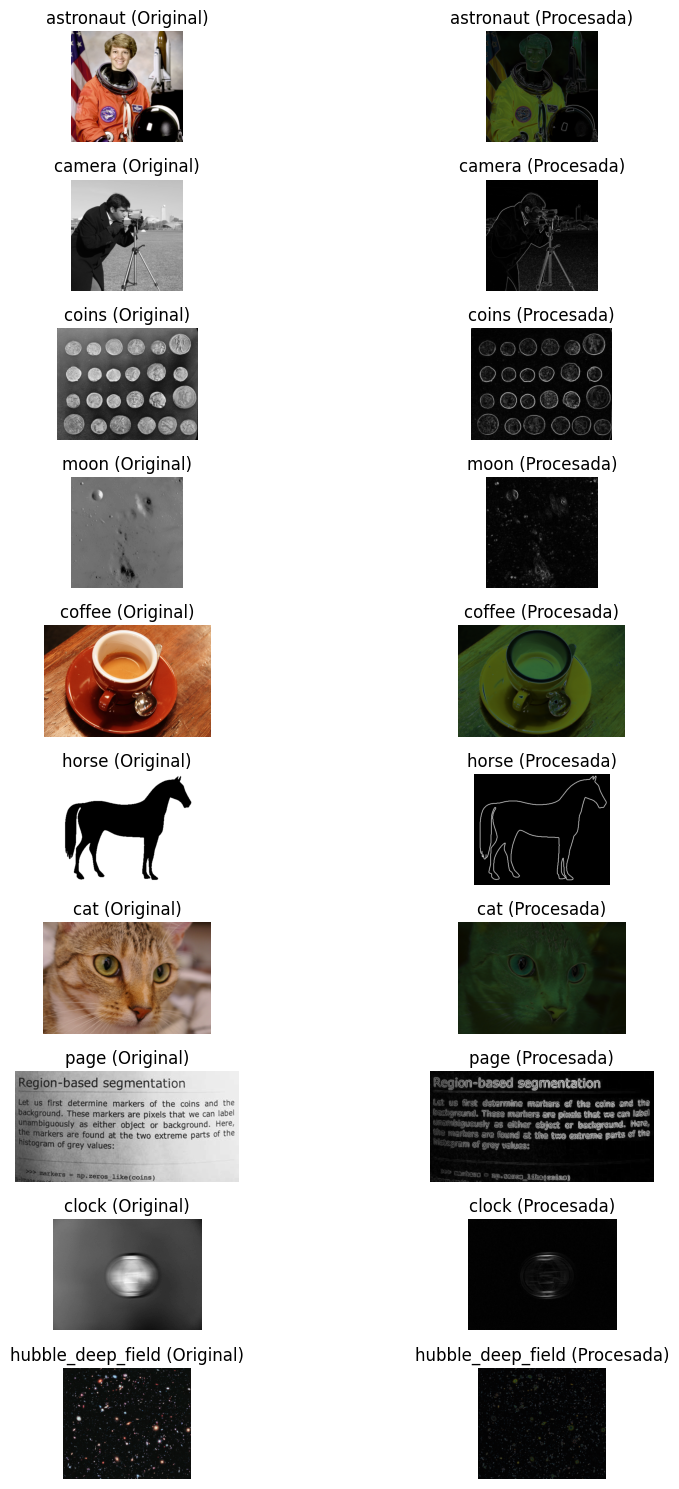

In [ ]:
import concurrent.futures
import matplotlib.pyplot as plt
from skimage import data, filters

# Generar datos simulados de imágenes
image_types = ['astronaut', 'camera', 'coins', 'moon', 'coffee', 'horse', 'cat', 'page', 'clock', 'hubble_deep_field']

# Función para aplicar el procesamiento a una imagen
def process_image(image):
    return filters.sobel(image)

# Dividir los datos en fragmentos para el mapeo en paralelo
def chunkify(lst, num_chunks):
    avg = len(lst) // num_chunks
    out = []
    last = 0
    while last < len(lst):
        out.append(lst[last:last + avg])
        last += avg
    return out

# Generar imágenes simuladas
images = [data.astronaut(), data.camera(),data.coins(), data.moon(), data.coffee(),
          data.horse(), data.cat(), data.page(), data.clock(), data.hubble_deep_field()]

# Número de procesos en paralelo para la fase de mapeo
num_processes_map = 4

# Dividir las imágenes en fragmentos para cada proceso de mapeo
chunks_map = chunkify(images, num_processes_map)

# Fase de mapeo en paralelo
def parallel_map(chunk):
    return [process_image(img) for img in chunk]

with concurrent.futures.ThreadPoolExecutor(max_workers=num_processes_map) as executor:
    mapped_results = list(executor.map(parallel_map, chunks_map))

# Combina los resultados mapeados de los fragmentos
processed_images = [image for chunk in mapped_results for image in chunk]

# Visualización de las imágenes originales y procesadas
num_rows = len(image_types)
num_cols = 2  # Original y Procesada

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

for row in range(num_rows):
    axes[row, 0].imshow(images[row], cmap='gray')
    axes[row, 0].set_title(f'{image_types[row]} (Original)')
    axes[row, 0].axis('off')

    axes[row, 1].imshow(processed_images[row], cmap='gray')
    axes[row, 1].set_title(f'{image_types[row]} (Procesada)')
    axes[row, 1].axis('off')

plt.tight_layout()
plt.show()